# (11468) Shantanunaidu orbit determination test

In [1]:
import grss
prop = grss.prop
fit = grss.fit

In [2]:
import numpy as np
np.set_printoptions(precision=40, linewidth=np.inf)
import matplotlib.pyplot as plt

In [3]:
body_id = '11468'
init_sol, init_cov, nongrav_info = fit.get_sbdb_info(body_id)
body_radius = 0.0
de_kernel = 441
de_kernel_path = grss.utils.default_kernel_path(de_kernel)

In [4]:
add_gaia_obs = True
optical_obs_file = None
t_min_tdb = None
t_max_tdb = None
debias_hires = False
debias_lowres = True
deweight = True
eliminate = False
max_obs_per_night = 4
verbose = True
obs_array_optical, observer_codes_optical = fit.get_mpc_optical_obs_array(body_id, de_kernel_path, optical_obs_file, t_min_tdb, t_max_tdb, debias_hires, debias_lowres, deweight, eliminate, max_obs_per_night, verbose)
obs_array_radar, observer_codes_radar = fit.get_radar_obs_array(body_id, t_min_tdb, t_max_tdb, verbose)
if add_gaia_obs:
    gaia_dr = 'gaiafpr'
    obs_array_gaia, observer_codes_gaia = fit.get_gaia_optical_obs_array(body_id, de_kernel_path, t_min_tdb, t_max_tdb, gaia_dr, verbose)
    obs_array_optical = np.vstack((obs_array_optical, obs_array_gaia))
    observer_codes_optical = observer_codes_optical + observer_codes_gaia

Skipped 0 observations 
	 0 of which were non-geocentric occultations, 
	 0 were either roving or radar observations (radar is handled separately), 
	 0 of which were outside the specified time range.
No debiasing needed for 626 observations. Debiased 990 observations. No biasing information for 24 observations.
Applied default weight of 1 arcsec to 102 CCD observations
Deweighted 407 observations as part of deweighting scheme.
Found 308 observations from gaiafpr
	 Added 308 of those observations.


In [5]:
n_iter_max = 10
fit_sim = fit.FitSimulation(init_sol, init_cov, obs_array_optical, observer_codes_optical, obs_array_radar, observer_codes_radar, n_iter_max=n_iter_max, de_kernel=de_kernel, de_kernel_path=de_kernel_path, radius=body_radius, nongrav_info=nongrav_info)

In [6]:
fit_sim.filter_lsq()

Iteration		Unweighted RMS		Weighted RMS 		Chi-squared		Reduced Chi-squared
1			 0.444			 0.614			 1200.653			 0.309
2			 0.445			 0.605			 1205.346			 0.310
3			 0.445			 0.605			 1205.345			 0.310
Converged without rejecting outliers. Starting outlier rejection now...
4			 0.409			 0.584			 1104.563			 0.285
5			 0.409			 0.584			 1105.164			 0.285
Converged after rejecting outliers. Rejected 6 out of 1948 optical observations.


In [7]:
fit_sim.print_summary()

Summary of the orbit fit calculations at iteration 5 (of 5):
RMS unweighted: 0.4086730331302703
RMS weighted: 0.5842916073253057
chi-squared: 1105.1640497112812
reduced chi-squared: 0.2849829937367925
square root of reduced chi-squared: 0.5338379845391226
--------------------------------------------------------------
Solution Time: MJD 57554.000 TDB = 2016-06-15 00:00:00.000 TDB
Solution Observation Arc: 15628.95 days
--------------------------------------------------------------
Fitted Variable		Initial Value			Uncertainty			Fitted Value 			Uncertainty			Change				Change (sigma)
e			1.66689208927e-01		2.27114730593e-09 		1.66689208873e-01		2.27336266070e-09 		-5.43749767434e-11		-0.024
q			2.56502647958e+00		2.93101837979e-09 		2.56502649369e+00		2.90819217382e-09 		+1.41080924720e-08		+4.813
tp			5.75113331212e+04		4.23910718449e-06 		5.75113331294e+04		4.21117367101e-06 		+8.23918526294e-06		+1.944
om			2.06375002750e+02		6.73552392878e-06 		2.06375014798e+02		6.68167021420e-06 		+1

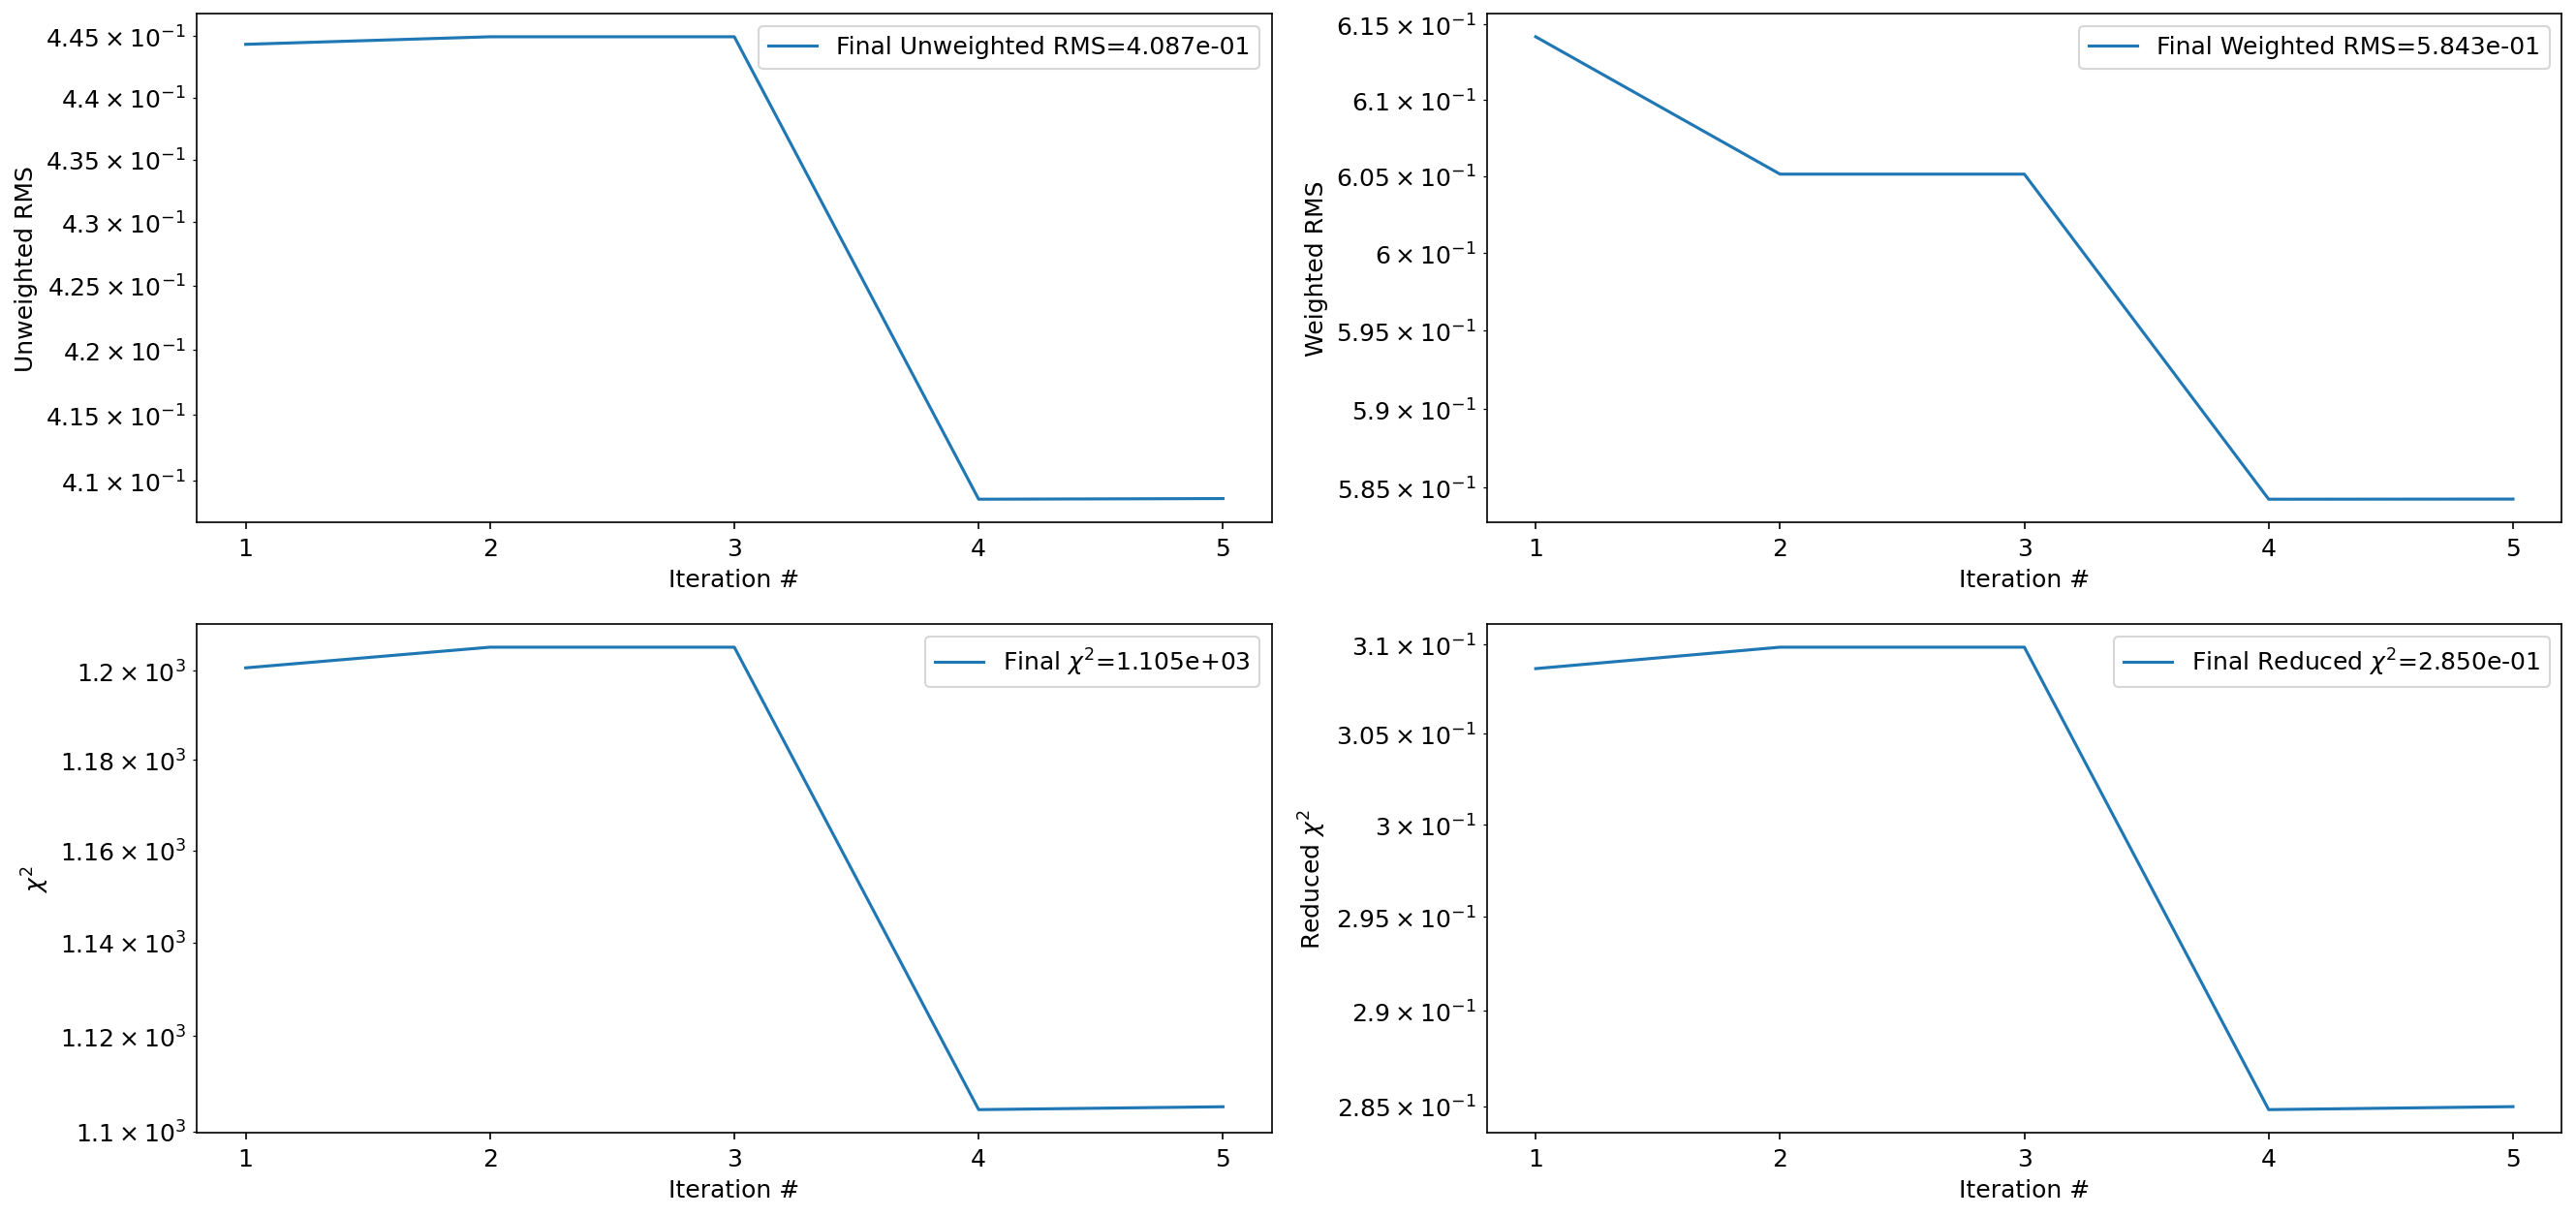

In [8]:
fit_sim.plot_summary(auto_close=True)

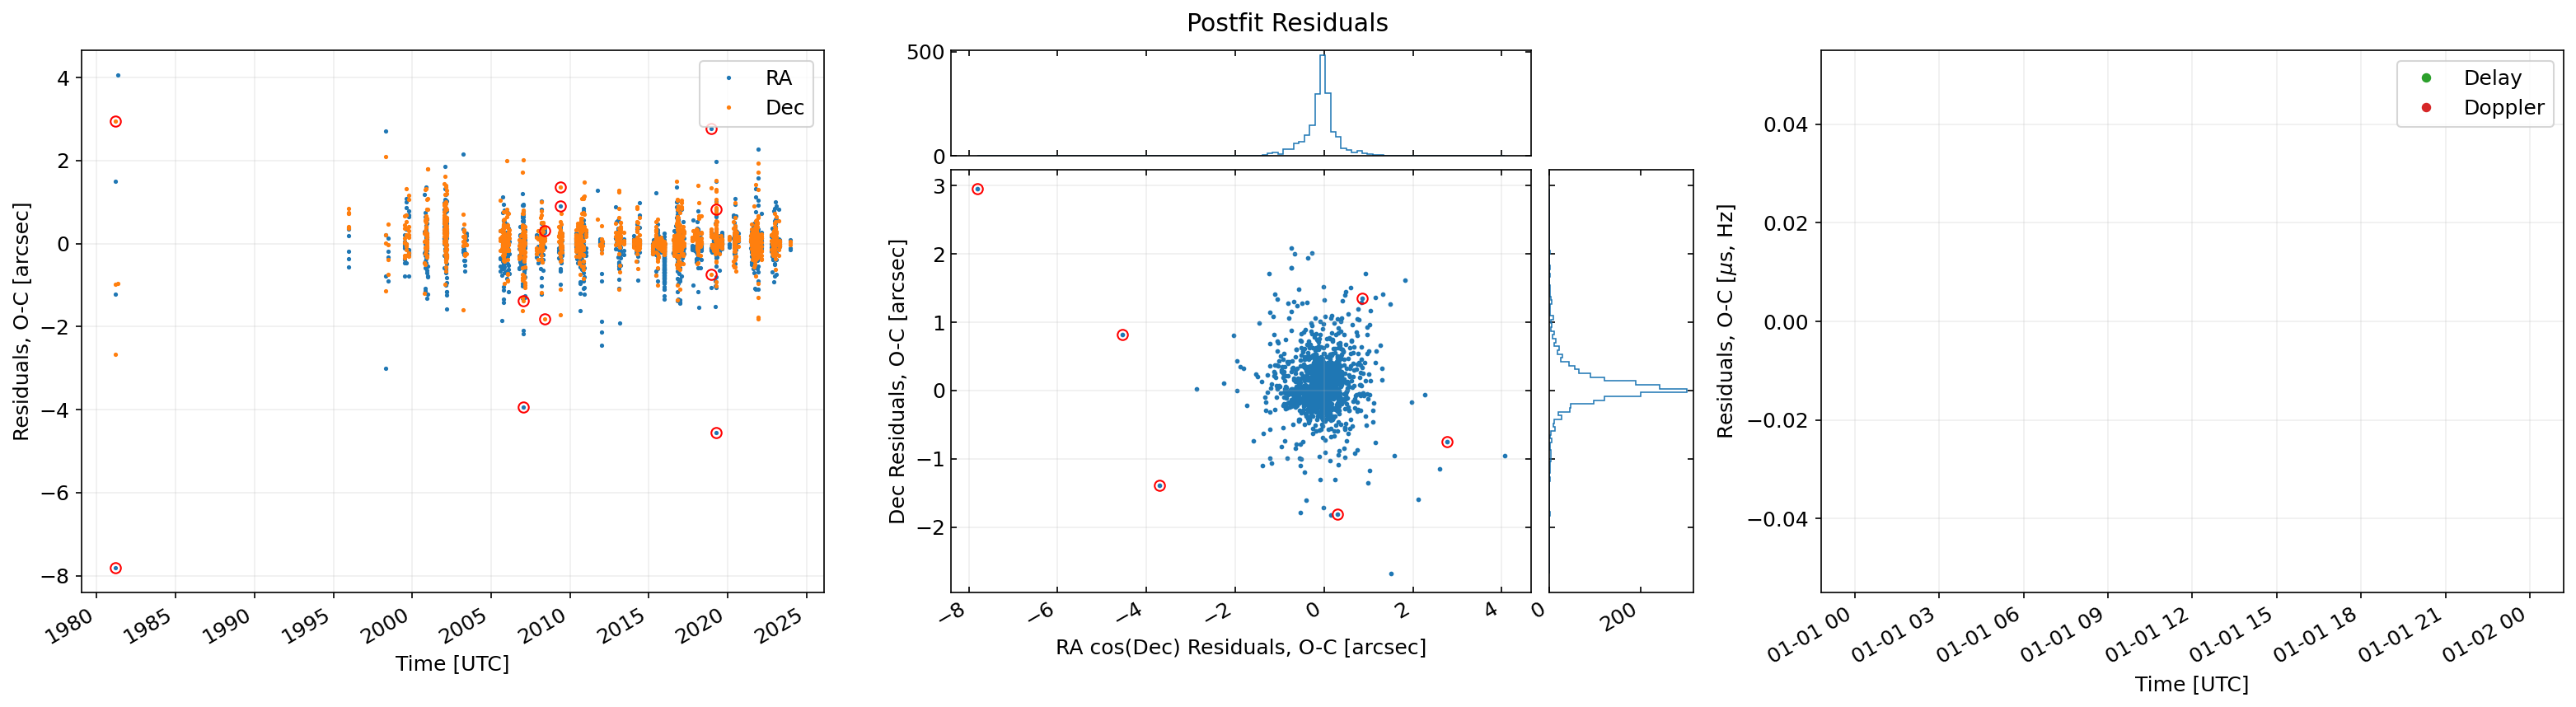

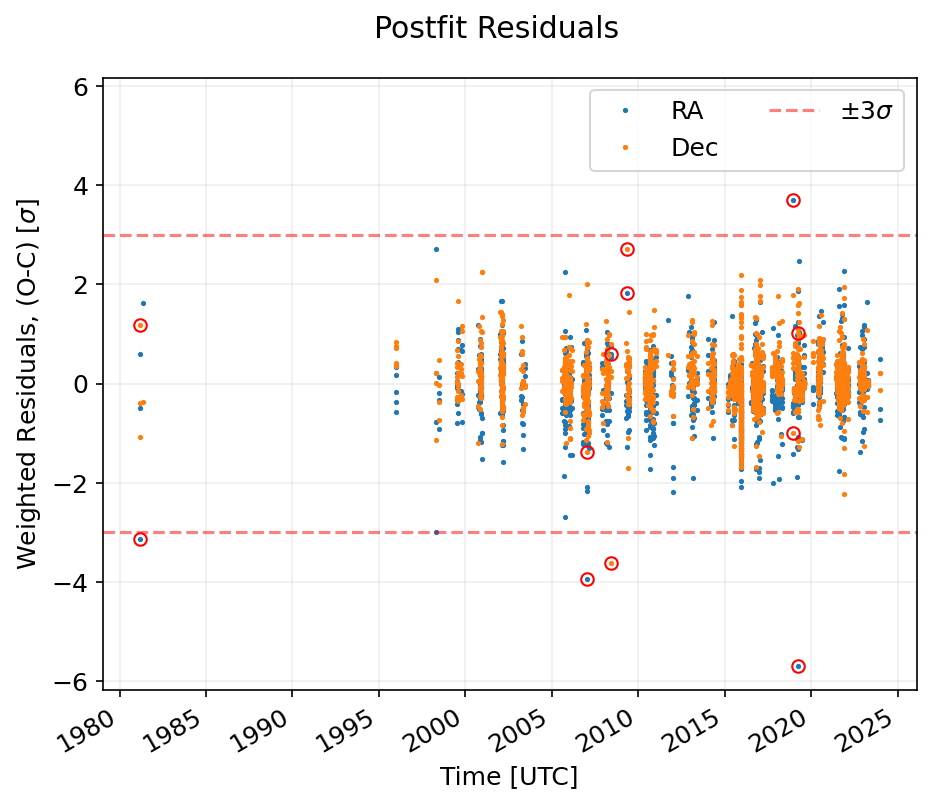

In [9]:
fit_sim.iters[-1].plot_iteration_summary(title='Postfit Residuals', auto_close=True)

In [10]:
mean_0 = np.array(list(init_sol.values())[1:])
cov_0 = init_cov
mean_f = np.array(list(fit_sim.x_nom.values()))
cov_f = fit_sim.covariance

maha_dist_f, maha_dist_0, bhattacharya, bhatt_coeff = fit.get_similarity_stats(mean_0, cov_0, mean_f, cov_f)
print(f'Mahalonobis distance between JPL and GRSS solution: {maha_dist_f:0.2f}')
print(f'Mahalonobis distance between GRSS and JPL solution: {maha_dist_0:0.2f}')
print(f'Bhattacharya distance between JPL and GRSS solution: {bhattacharya:0.4f}')
print(f'Bhattacharya coefficient between JPL and GRSS solution: {bhatt_coeff:0.4f}')

Mahalonobis distance between JPL and GRSS solution: 6.53
Mahalonobis distance between GRSS and JPL solution: 6.59
Bhattacharya distance between JPL and GRSS solution: 0.0003
Bhattacharya coefficient between JPL and GRSS solution: 0.9997


In [11]:
assert maha_dist_f < 5.0
assert maha_dist_0 < 5.0
assert bhattacharya < 0.10
assert bhatt_coeff > 0.90

AssertionError: 